In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools
import pandas as pd
from scipy import stats

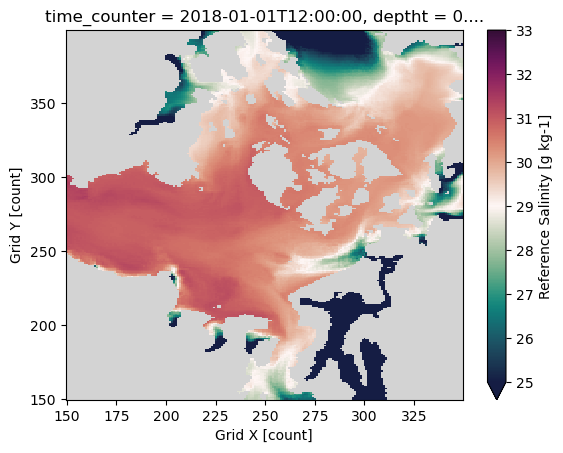

In [2]:
phys = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jan18/SalishSea_1d_20180101_20180101_grid_T.nc')

iz = 0
it = 0
cmap = cm.curl
cmap.set_bad('lightgrey')
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
vmin = 25
vmax = 33

fig,ax = plt.subplots()

field = 'vosaline'
y_slice=slice(150+iz, 400-iz)
x_slice=slice(150+iz, 350-iz)

(phys[field]
.isel(time_counter=it, deptht=0, y=y_slice, x=x_slice)
.where(tmask.isel(z=0, y=y_slice, x=x_slice))
.plot(ax=ax, cmap=cmap, vmax=vmax, vmin=vmin))


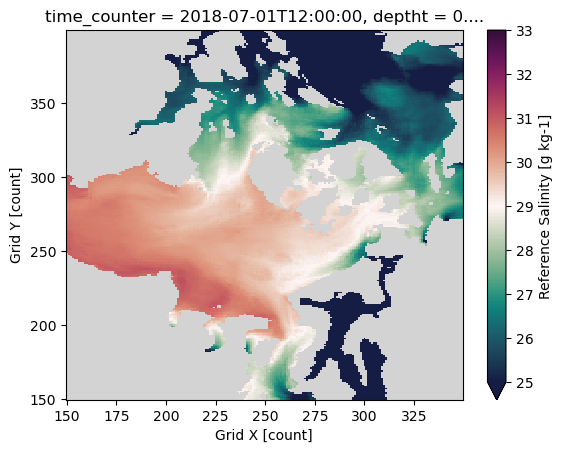

In [3]:
phys = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jul18/SalishSea_1d_20180701_20180701_grid_T.nc')

fig,ax = plt.subplots()

field = 'vosaline'
y_slice=slice(150+iz, 400-iz)
x_slice=slice(150+iz, 350-iz)

(phys[field]
.isel(time_counter=it, deptht=0, y=y_slice, x=x_slice)
.where(tmask.isel(z=0, y=y_slice, x=x_slice))
.plot(ax=ax, cmap=cmap, vmax=vmax, vmin=vmin))


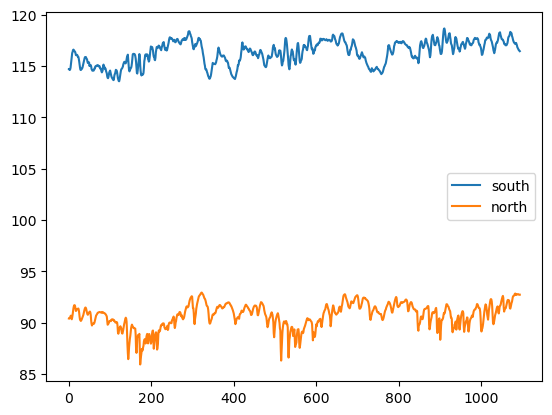

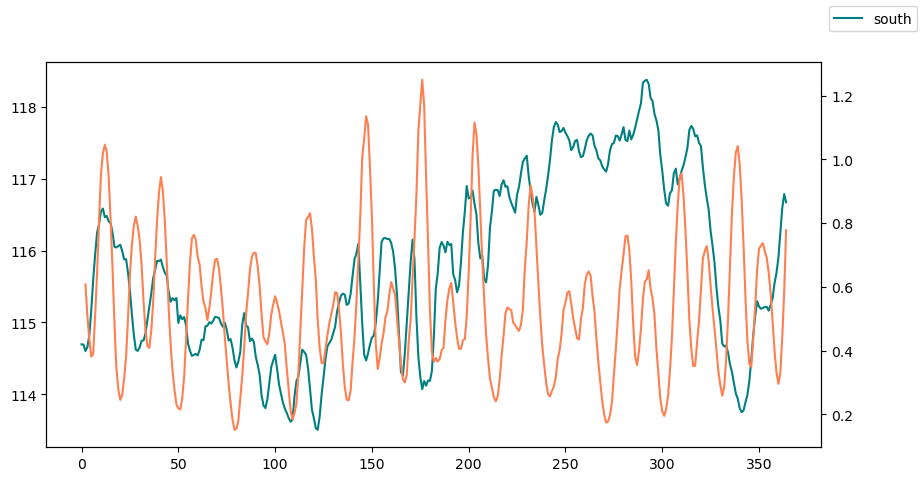

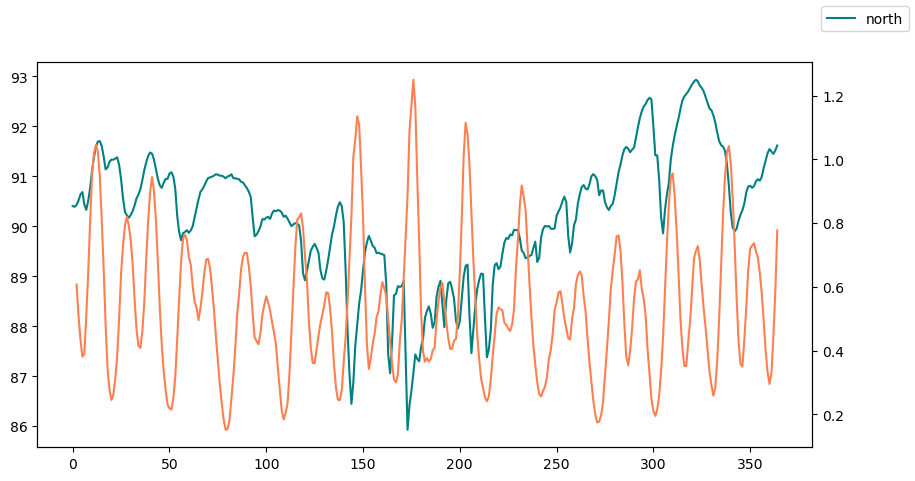

In [4]:
density_ros = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_2018_rosarioNS.csv')
dens_diff_ros = np.array(density_ros.south - density_ros.north)

tides = pd.read_csv('low_pass_tide.csv')

plt.plot(density_ros.south,label='south')
plt.plot(density_ros.north,label='north')
plt.legend()

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(density_ros.south[0:365],label='south',color='teal')
ax2 = ax.twinx()
# ax.plot(density_ros.north[0:365],label='north',color='coral')

ax2.plot(tides.vozocrtx[0:365],color='coral')
fig.legend()

fig,ax = plt.subplots(figsize=(10,5))

# ax.plot(density_ros.south[0:365],label='south',color='teal')
ax2 = ax.twinx()
ax.plot(density_ros.north[0:365],label='north',color='teal')

ax2.plot(tides.vozocrtx[0:365],color='coral')
fig.legend()

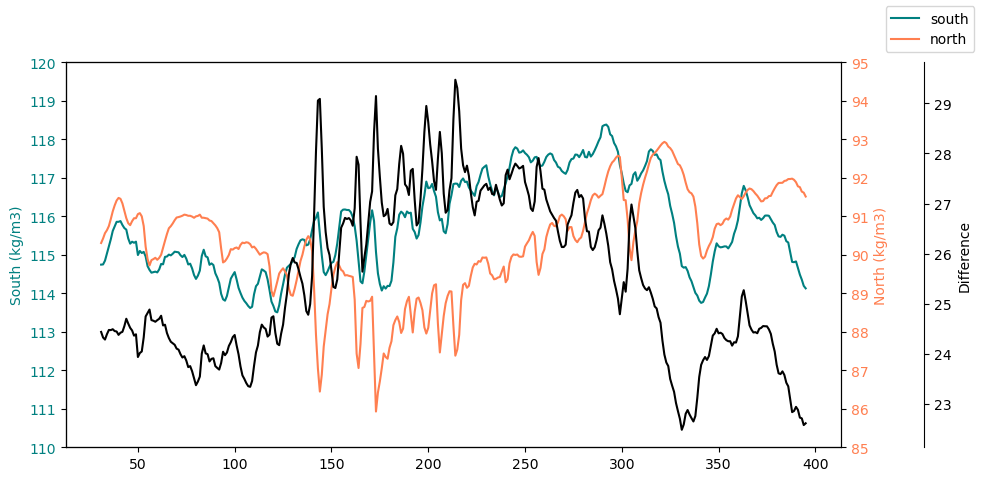

In [5]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(density_ros.south[31:365+31],label='south',color='teal')
ax2 = ax.twinx()
ax2.plot(density_ros.north[31:365+31],label='north',color='coral')
ax.set_ylim([110,120])
ax2.set_ylim([85,95])
ax.set_yticks(np.arange(110,121,1),color='teal')
ax.set_yticklabels(np.arange(110,121,1),color='teal')
ax.set_ylabel('South (kg/m3)',color='teal')
ax2.set_ylabel('North (kg/m3)',color='coral')
ax2.set_yticks(np.arange(85,96,1),color='coral')
ax2.set_yticklabels(np.arange(85,96,1),color='coral')
ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(density_ros.south[31:365+31] - density_ros.north[31:365+31],color='k')
ax3.set_ylabel('Difference')
fig.legend()

In [6]:
stats.iqr(density_ros.south[31:365+31]),stats.iqr(density_ros.north[31:365+31])

(2.0954887629066974, 1.784815660814786)

In [7]:
density_ros.south[31:365+31].max() - density_ros.south[31:365+31].min()

4.876681386354818

In [8]:
density_ros.north[31:365+31].max() - density_ros.north[31:365+31].min()


7.003979835456931